# **Importing important dependencies**

In [704]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

### **Dataset Load**

In [705]:
turbine_df=pd.read_csv("energy_production.csv",sep=";")
turbine_df

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


## **Exloratory Data Analysis**

In [706]:
turbine_df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [707]:
turbine_df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


#### ***Checking for Corelation between estimaters***

In [708]:
turbine_df.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

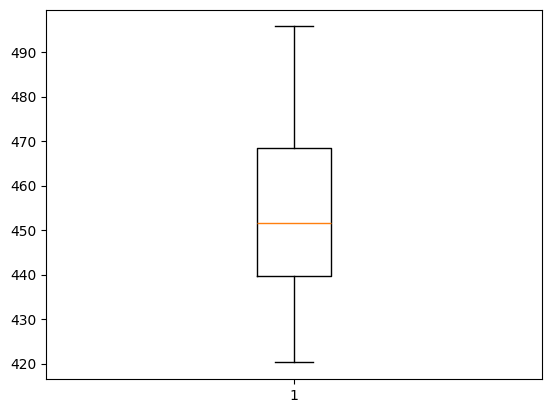

In [709]:
plt.boxplot(turbine_df['energy_production'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

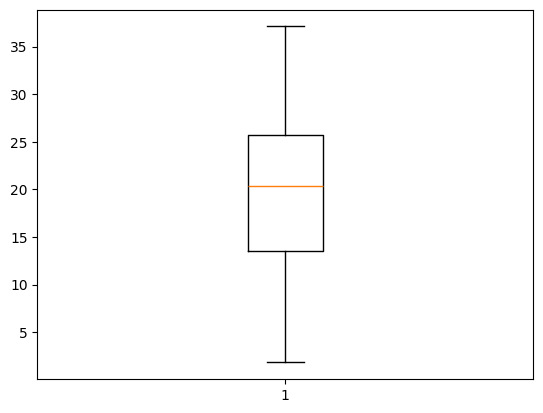

In [710]:
plt.boxplot(turbine_df['temperature'])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

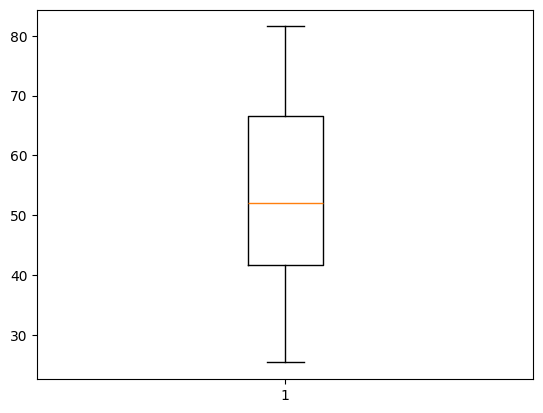

In [711]:
plt.boxplot(turbine_df['exhaust_vacuum'])
plt.show

#### ***Corelation between Temperature and Energy Production***

<Axes: xlabel='temperature', ylabel='energy_production'>

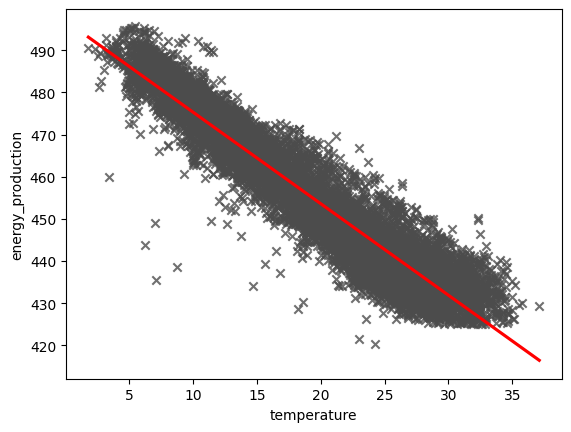

In [712]:

sns.regplot(
    data=turbine_df, x='temperature', y='energy_production',
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),)

#### ***Corelation between r_humidity and Energy Production***

<Axes: xlabel='r_humidity', ylabel='energy_production'>

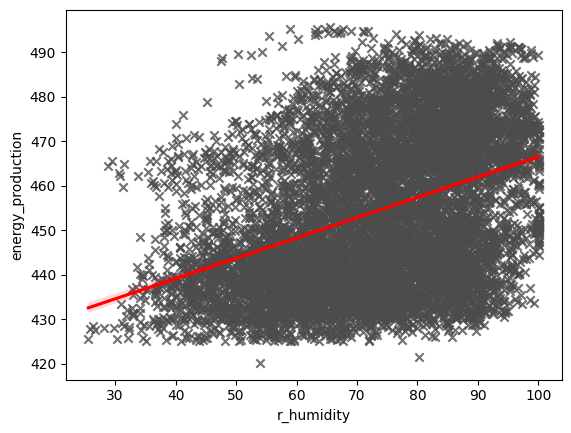

In [713]:

sns.regplot(
    data=turbine_df, x='r_humidity', y='energy_production',
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),)

#### ***Corelation between exhaust_vacuum and Energy Production***

<Axes: xlabel='exhaust_vacuum', ylabel='energy_production'>

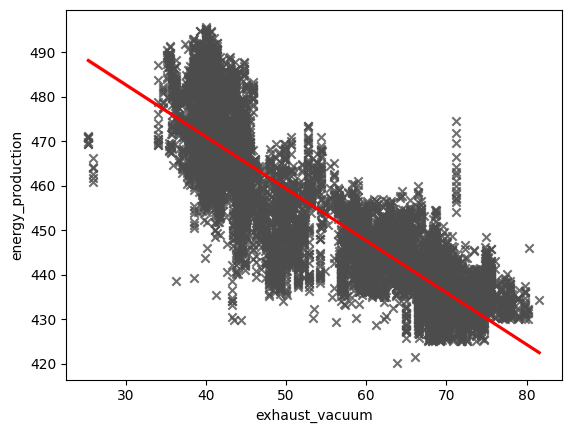

In [714]:
sns.regplot(
    data=turbine_df, x='exhaust_vacuum', y='energy_production',
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),)

#### ***Corelation between amb_pressure and Energy Production***

<Axes: xlabel='amb_pressure', ylabel='energy_production'>

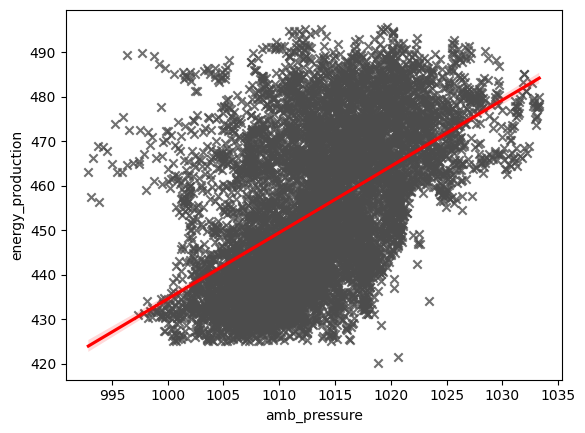

In [715]:
sns.regplot(
    data=turbine_df, x='amb_pressure', y='energy_production',
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),)

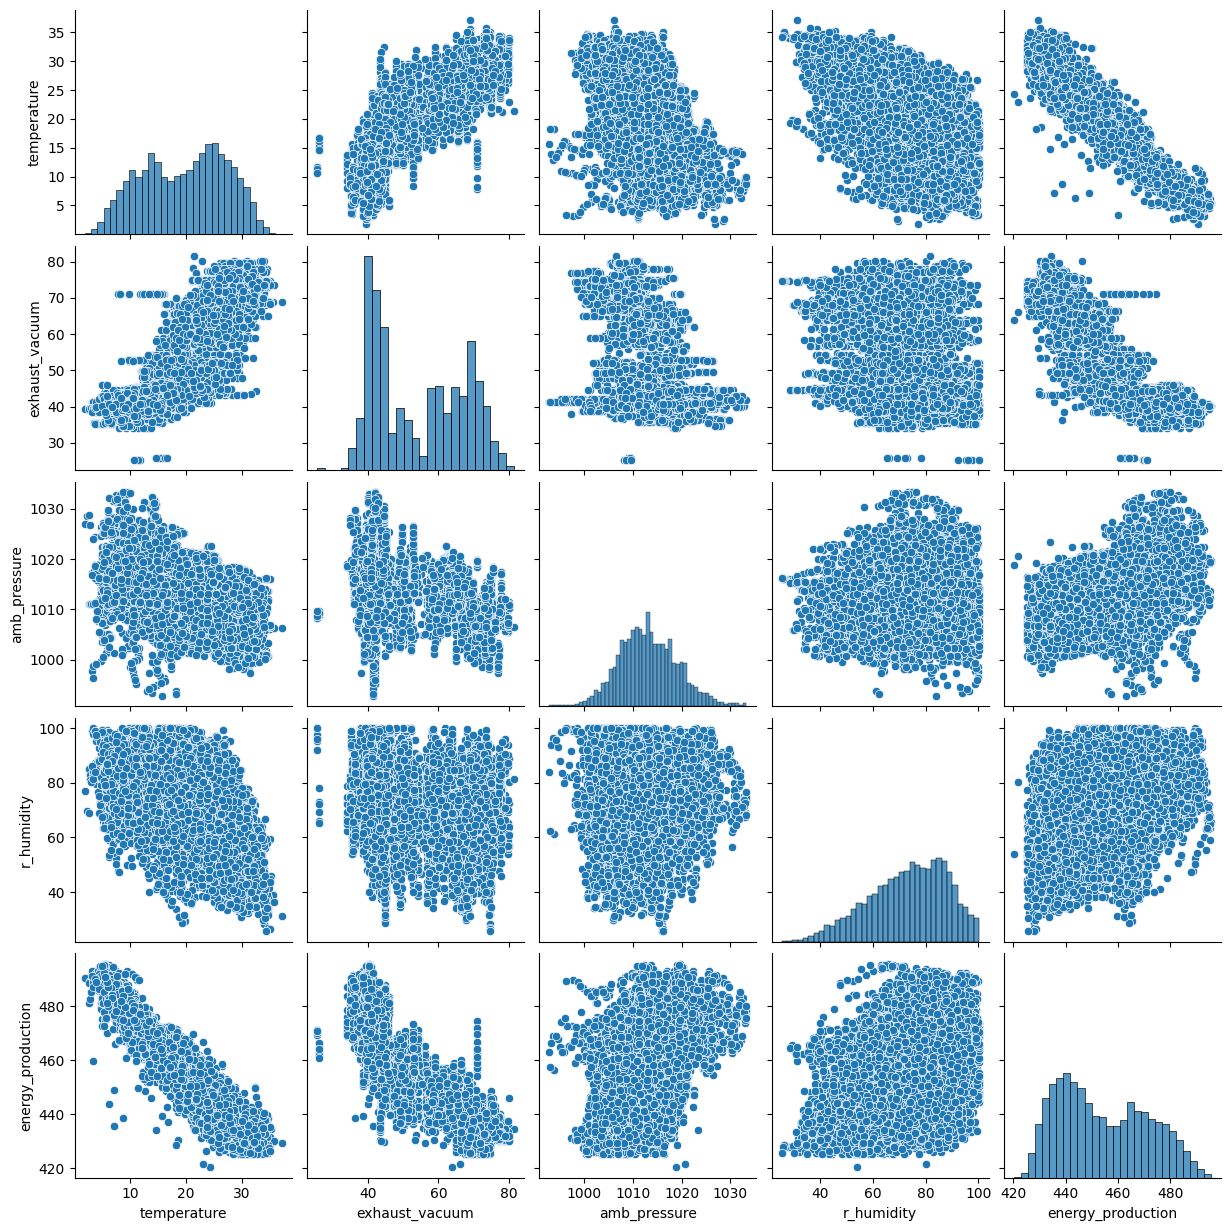

In [716]:
#Format the plot background and scatter plots for all the variables
sns.pairplot(turbine_df)

## ***Feature Selection***

In [717]:
# Independant and Dependant Features
X=turbine_df.iloc[:,0:-1] # Independant Feature
y=turbine_df.iloc[:,-1] #Dependant Feature--> Series or 1D array

### ***Train Test Split***

In [718]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [719]:
# Apply PCA for feature reduction
from sklearn.decomposition import PCA
pca = PCA()  # Reduce to 5 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

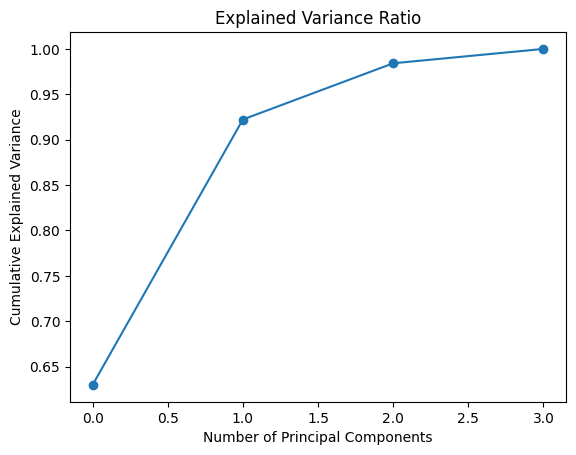

In [720]:
# Plot the explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

## **Linear Regression**

In [721]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import cross_val_score

lgr=LinearRegression()
regress=lgr.fit(X_train,y_train)


In [722]:
print('Coefiicient or Slope',regress.coef_)
print('Intercept',regress.intercept_)

Coefiicient or Slope [-1.99085651 -0.2310534   0.05992458 -0.15927784]
Intercept 457.01002245118167


In [723]:
# cross Validation
validation_score=cross_val_score(lgr,X_train,y_train,scoring='r2',cv=5)
print('validation_Score -->',np.mean(validation_score))
# cross Validation
validation_score=cross_val_score(lgr,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)
print('validation_Score -->',np.mean(validation_score))

validation_Score --> 0.9305706497969928
validation_Score --> -3.608640591991341


In [724]:
y_pred=regress.predict(X_test)
y_pred

array([428.80831535, 459.75461068, 450.61336386, ..., 452.1657498 ,
       453.57345604, 475.68092194])

In [725]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error
mse= mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print("Mean Absolute Eroor:",mae)
print("Root Mean Square Error:",rmse)
print(f"Mean Squared Error: {mse}")

Mean Absolute Eroor: 3.6875283714834657
Root Mean Square Error: 4.708340623090541
Mean Squared Error: 22.16847142304462


In [726]:
# Coefficient of Determination
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9198969303303213


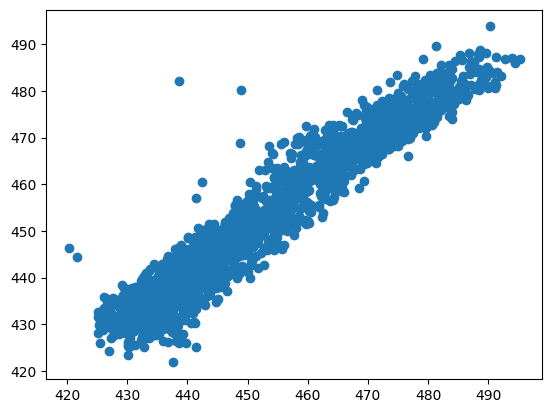

In [727]:
plt.scatter(y_test,y_pred)


In [728]:
residuals=y_test-y_pred
print(residuals)

5925   -2.918315
4294    3.965389
7120    2.766636
6688    4.359645
7322   -0.430789
          ...   
6304    1.928900
2212    0.737109
5371   -1.455750
3900   -0.643456
7911    1.369078
Name: energy_production, Length: 1914, dtype: float64


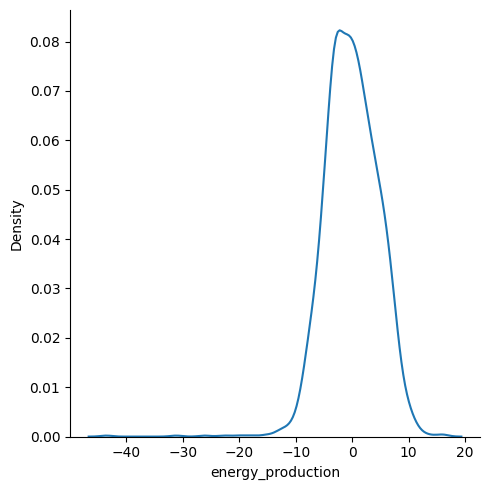

In [729]:
sns.displot(residuals,kind='kde')

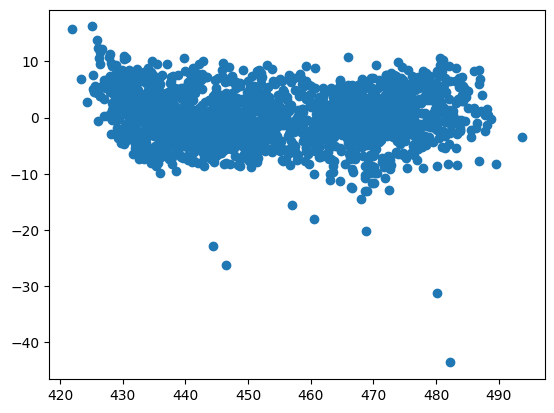

In [730]:
# Scater Plot with respect to residuals and Prediction
plt.scatter(y_pred,residuals)

##### ***Residual Plot***

<StemContainer object of 3 artists>

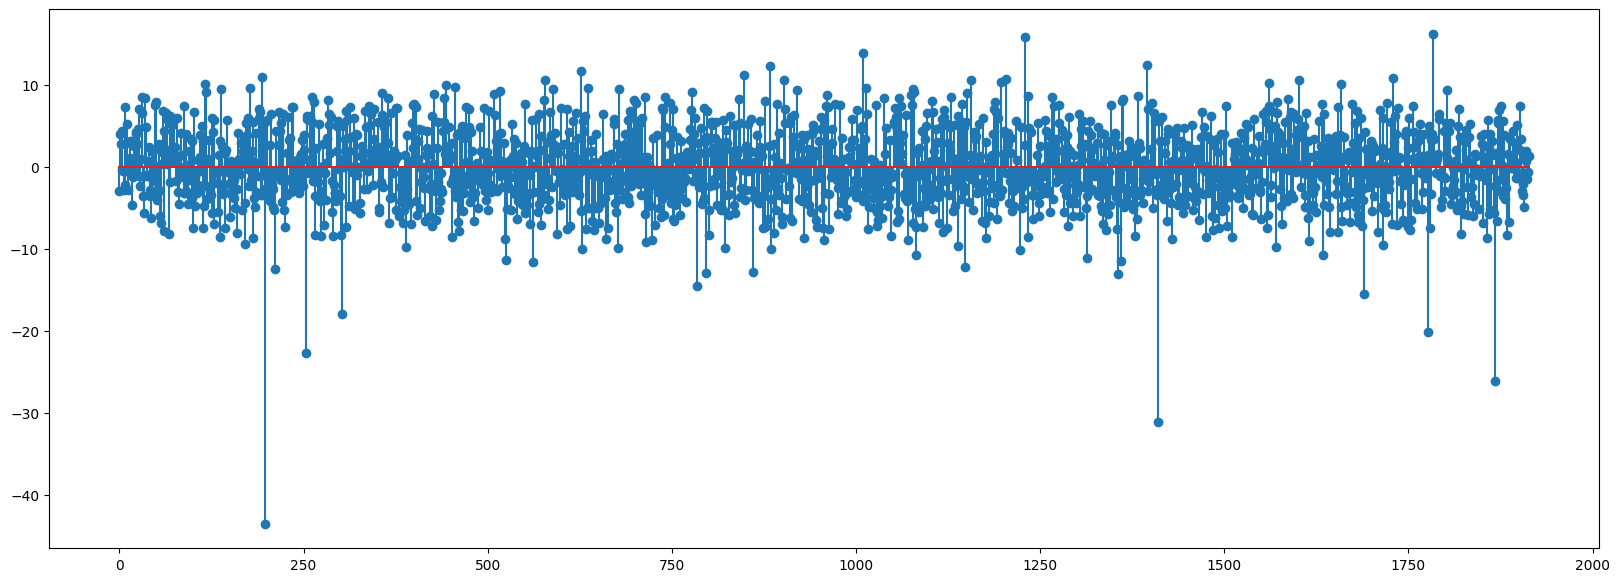

In [731]:
from statsmodels.graphics.regressionplots import influence_plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(y_test)),np.round(residuals,3))

In [732]:
# Coefficient of Determination
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9198969303303213


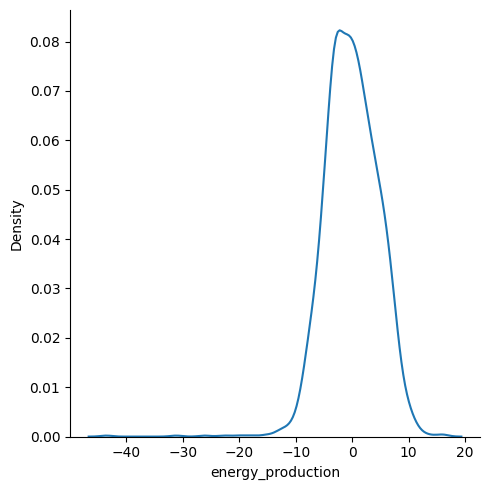

In [733]:
residuals=y_test-y_pred
sns.displot(residuals,kind='kde')

## ***Random Forest Regressor***

In [734]:
from sklearn.ensemble import RandomForestRegressor
ran_rgr=RandomForestRegressor()
ran_rgr_model=ran_rgr.fit(X_train_pca, y_train)
# Predictions on the test set
y_pred = ran_rgr.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred,)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
print("Mean Absolute Eroor:",mae)
print("Root Mean Square Error:",rmse)
print(f"Mean Squared Error: {mse}")


Mean Absolute Eroor: 2.799712957157793
Root Mean Square Error: 3.8846752191107154
Mean Squared Error: 15.090701557972885


In [735]:
# Coefficient of Determination
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print('Coefficient of Determination:',np.round(score,3))

Coefficient of Determination: 0.945


In [736]:
# cross Validation for R2 Score
validation_score=cross_val_score(ran_rgr,X_train,y_train,scoring='r2',cv=5)
print('validation_Score -->',np.mean(validation_score))
# cross Validation for neg_mean_absolute_error
validation_score=cross_val_score(ran_rgr,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)
print('validation_Score -->',np.mean(validation_score))

validation_Score --> 0.9612634154380173
validation_Score --> -2.4340760595450037


5925   -6.6754
4294    0.6170
7120    4.9797
6688   -0.9905
7322   -2.0037
         ...  
6304    0.2979
2212    1.1219
5371   -2.1304
3900    0.0562
7911   -1.2364
Name: energy_production, Length: 1914, dtype: float64


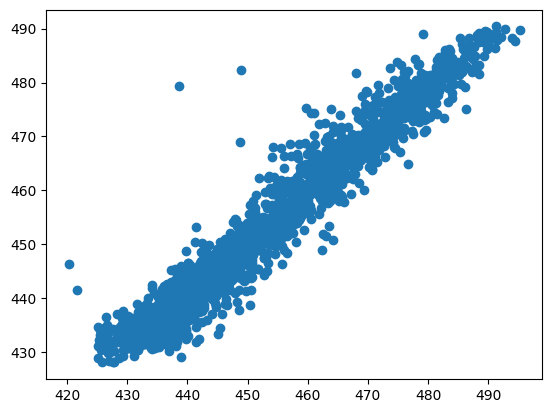

In [737]:
plt.scatter(y_test,y_pred)
residuals=y_test-y_pred

print(residuals)

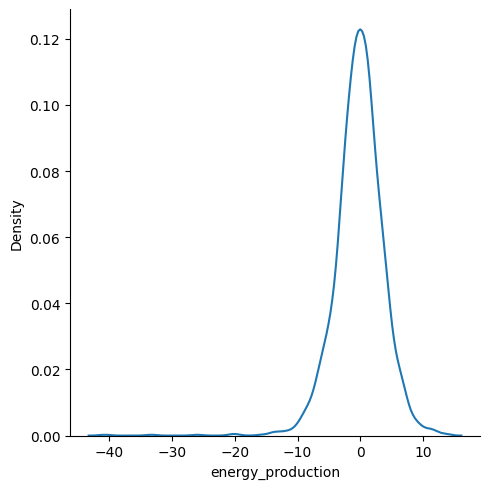

In [738]:
sns.displot(residuals,kind='kde')

<StemContainer object of 3 artists>

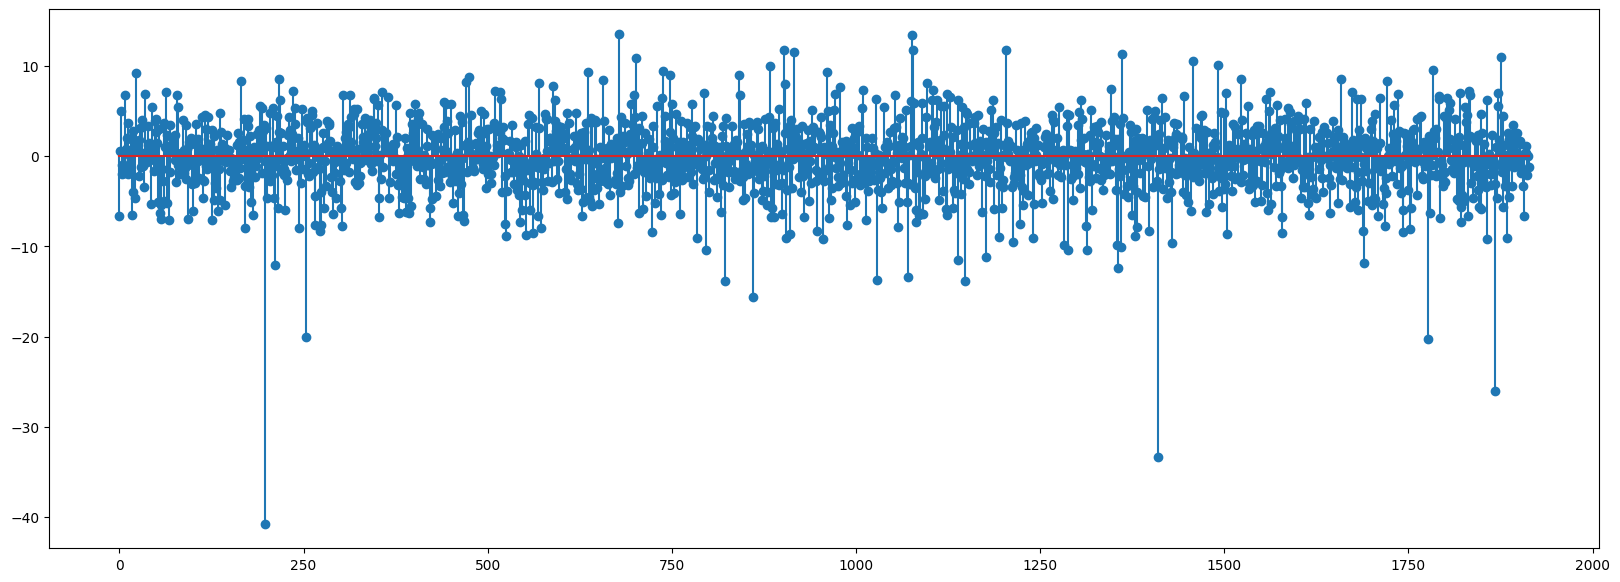

In [739]:
from statsmodels.graphics.regressionplots import influence_plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(y_test)),residuals)

In [740]:
import pickle
import pickle
pickle.dump(ran_rgr,open('model.pkl','wb'))

## ***Decision Tree Regression***

In [741]:
from sklearn.tree import DecisionTreeRegressor
Dec_regr=DecisionTreeRegressor()
Dec_regr_model=Dec_regr.fit(X_train_pca, y_train)
# Predictions on the test set
y_pred = Dec_regr.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
print("Mean Absolute Eroor:",mae)
print("Root Mean Square Error:",rmse)
print(f"Mean Squared Error: {mse}")

Mean Absolute Eroor: 3.8805590386624873
Root Mean Square Error: 5.514482476184533
Mean Squared Error: 30.409516980146293


In [742]:
# Coefficient of Determination
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print('Coefficient of Determination:',np.round(score,3))

Coefficient of Determination: 0.89


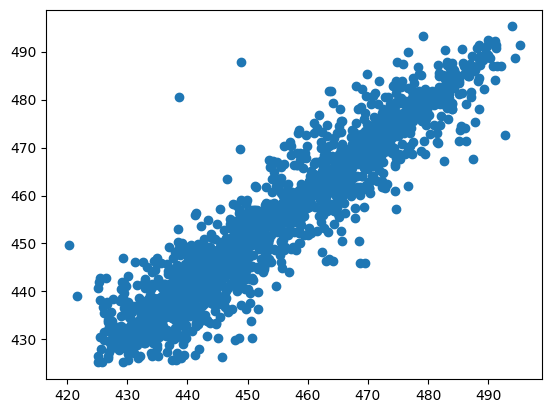

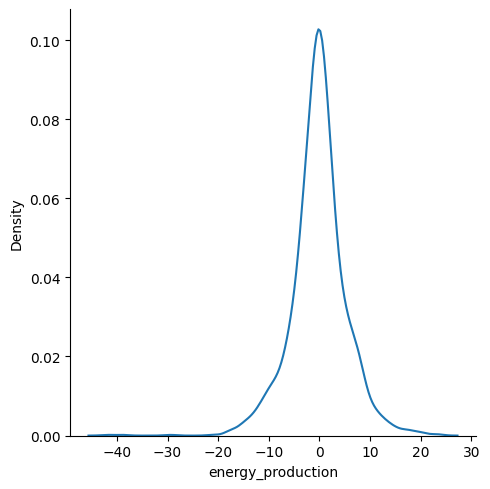

In [743]:
plt.scatter(y_test,y_pred)
residuals=y_test-y_pred
sns.displot(residuals,kind='kde')

## ***Support Vector Regression***

In [744]:
from sklearn.svm import SVR
svr=SVR()
Svr_model=svr.fit(X_train_pca, y_train)
# Predictions on the test set
y_pred = svr.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
print("Mean Absolute Eroor:",mae)
print("Root Mean Square Error:",rmse)
print(f"Mean Squared Error: {mse}")

Mean Absolute Eroor: 3.3028890427901803
Root Mean Square Error: 4.388957364907569
Mean Squared Error: 19.262946750976386


In [745]:
# Coefficient of Determination
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print('Coefficient of Determination:',np.round(score,3))

Coefficient of Determination: 0.93


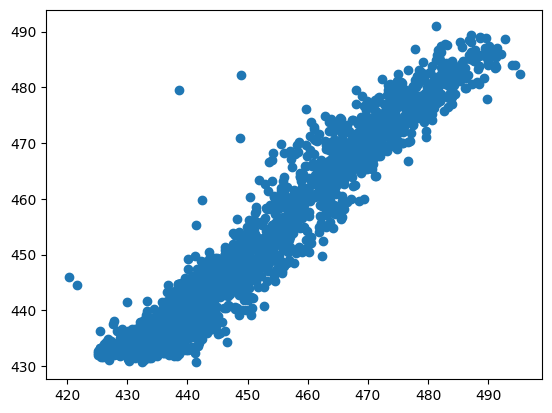

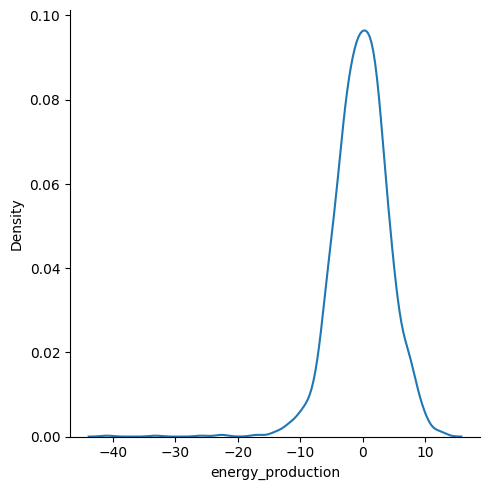

In [746]:
plt.scatter(y_test,y_pred)
residuals=y_test-y_pred
sns.displot(residuals,kind='kde')

## ***Lasso Regression***

In [747]:
from sklearn.linear_model import Lasso
import numpy as np
rng = np.random.RandomState(1)
# Fit regression model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X_train_pca, y_train)
# Predict

y_pred = lassoReg.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Eroor:",mae)
print("Root Mean Square Error:",rmse)
print(f"Mean Squared Error: {mse}")

Mean Absolute Eroor: 3.687459366621577
Root Mean Square Error: 4.706594687508906
Mean Squared Error: 22.152033552487055


In [748]:
# Coefficient of Determination
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print('Coefficient of Determination:',np.round(score,3))

Coefficient of Determination: 0.92


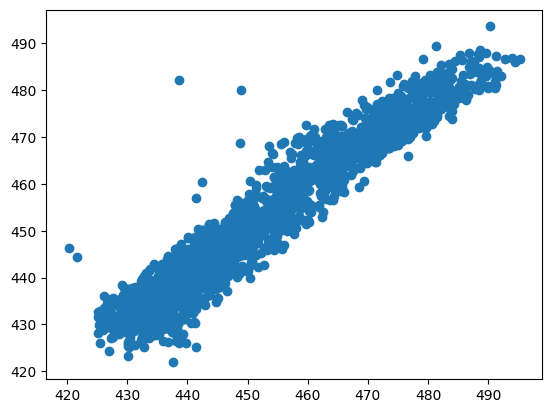

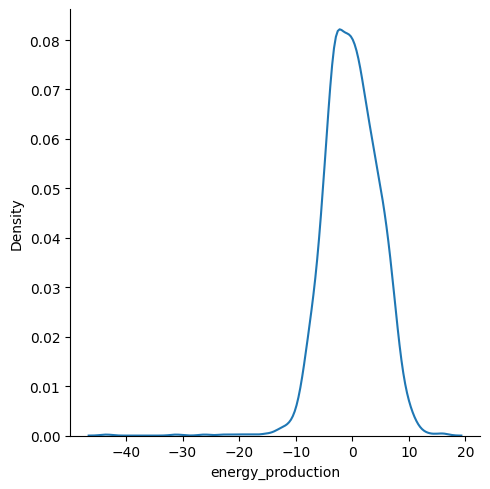

In [749]:
plt.scatter(y_test,y_pred)
residuals=y_test-y_pred
sns.displot(residuals,kind='kde')

## **Ridge Regression**

In [750]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1).fit(X_train_pca, y_train)
y_pred = ridge.predict(X_test_pca)
rmse = root_mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Eroor:",mae)
print("Root Mean Square Error:",rmse)
print(f"Mean Squared Error: {mse}")

Mean Absolute Eroor: 3.687528384485373
Root Mean Square Error: 4.708340266547664
Mean Squared Error: 22.152033552487055


In [751]:
# Coefficient of Determination
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print('Coefficient of Determination:',np.round(score,3))

Coefficient of Determination: 0.92


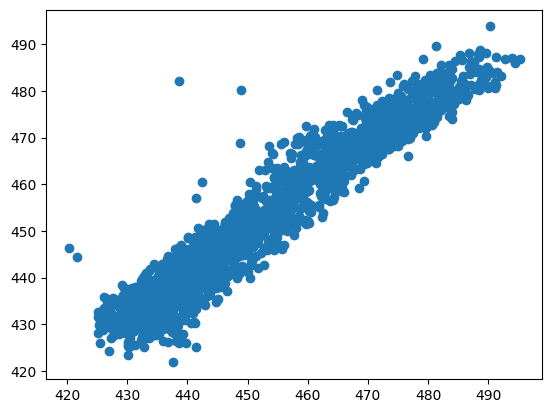

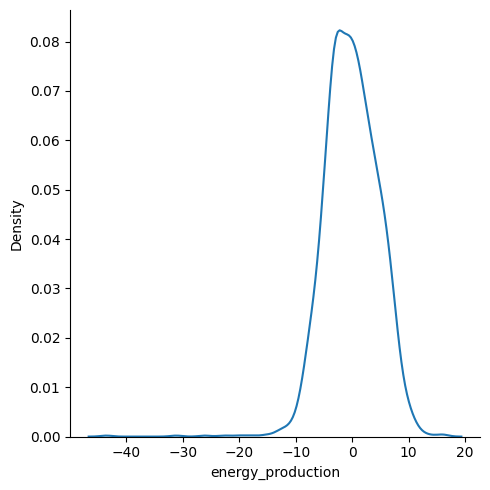

In [752]:
plt.scatter(y_test,y_pred)
residuals=y_test-y_pred
sns.displot(residuals,kind='kde')